# (Analyzing Ford GoBike Data Exploration)
## by (Eman Abdelrhman)



## Preliminary Wrangling
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area at feb 2009.
The system was originally launched as Bay Area Bike Share in August 2013. At launch, it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S. that services more than just a single city or adjacent cities. The original system was described as a pilot program and consisted of only 700 bicycles with 70 stations, 34 of which were in San Francisco
Bay Area Bike Share had originally planned for a larger initial rollout with 1000 bicycles and 50 stations in San Francisco

https://en.wikipedia.org/wiki/Bay_Wheels


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_ford=pd.read_csv('fordgobike.csv')
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# explore and overview of data shape and composition



In [3]:
#Get the number of rows and columns
df_ford.shape

(183412, 16)

In [4]:
#The data type of each column
df_ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
# a concise summary
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#number of unique elements
df_ford.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [7]:
#identify the missing values
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#count of duplicates
df_ford.duplicated().sum()

0

In [9]:
#calculating statistical data
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Data Cleaning ( is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database )
#convert start_time and end_time to "timestamp"
#convert user_type and member_gender to "category"
#drop rows which contain NAN value 
#make new columns from start time date column, day column and hour column
#calculate age from member birth year and add it as new column
#make copy of dataframe contain only the top 5 start station

In [10]:
#Making a copy of the original dataset
fordbike=df_ford.copy()

In [11]:
# convert the ' start_time' and 'end_time' columns to datetime format
fordbike['start_time'] = pd.to_datetime(fordbike['start_time'])
fordbike['end_time']=pd.to_datetime(fordbike['end_time'])


In [12]:
#convert'user_type' to 'category'
fordbike.user_type  = fordbike.user_type.astype('category')


In [13]:
#convert 'member_gender' to category
fordbike.member_gender= fordbike.member_gender.astype('category')

In [14]:
# Checking the Data Type 
fordbike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [15]:
#drop NAN value rows
fordbike = fordbike.dropna()
fordbike= fordbike.reset_index(drop=True)


In [16]:
fordbike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

i will make new columns from start_time 
 columns for day, hour 

In [17]:
#day and hour of trips
fordbike['date'] = fordbike.start_time.dt.strftime('%Y-%m-%d')
fordbike['day'] = fordbike.start_time.dt.strftime('%A')
fordbike['hour'] = fordbike.start_time.dt.strftime('%H')

In [18]:
#calcuate the age of trip member from member year birth
fordbike['age'] = fordbike['member_birth_year'].apply(lambda x: 2016 - x)
fordbike.age.min()

15.0

In [19]:
#rows and columns of data after cleaning
fordbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [20]:
#type of trips user
fordbike.user_type

0           Customer
1           Customer
2         Subscriber
3         Subscriber
4         Subscriber
             ...    
174947    Subscriber
174948    Subscriber
174949    Subscriber
174950    Subscriber
174951    Subscriber
Name: user_type, Length: 174952, dtype: category
Categories (2, object): ['Customer', 'Subscriber']

In [21]:
#total of trip user
fordbike.user_type.count()

174952

In [22]:
#total number of customer
customer=fordbike.query('user_type=="Customer"').bike_id.count()
customer

16566

In [23]:
#total number of subscriber
subscriber=fordbike.query('user_type=="Subscriber"').bike_id.count()
subscriber

158386

In [24]:
#total of female in trips
Female=fordbike.query('member_gender=="Female"').bike_id.count()
Female

40805

In [25]:
#total of male in trips
Male=fordbike.query('member_gender=="Male"').bike_id.count()
Male

130500

In [26]:
#total of other(member_gender) in trips
Other=fordbike.query('member_gender=="Other"').bike_id.count()
Other

3647

In [27]:
#the unique start station name and their value 
print(len(fordbike['start_station_name'].value_counts()))
fordbike['start_station_name'].value_counts()

329


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [28]:
#the unique end station name and their value 
print(len(fordbike['end_station_name'].value_counts()))
fordbike['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  5
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [29]:
#make copy of dataframe which contain only the top 5 station
s_st5 = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)','Powell St BART Station (Market St at 4th St)']
fordbike5 = fordbike.copy().loc[fordbike['start_station_name'].isin(s_st5)]
fordbike5.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Name: start_station_name, dtype: int64

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

In [30]:
fordbike5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14929 entries, 0 to 174948
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             14929 non-null  int64         
 1   start_time               14929 non-null  datetime64[ns]
 2   end_time                 14929 non-null  datetime64[ns]
 3   start_station_id         14929 non-null  float64       
 4   start_station_name       14929 non-null  object        
 5   start_station_latitude   14929 non-null  float64       
 6   start_station_longitude  14929 non-null  float64       
 7   end_station_id           14929 non-null  float64       
 8   end_station_name         14929 non-null  object        
 9   end_station_latitude     14929 non-null  float64       
 10  end_station_longitude    14929 non-null  float64       
 11  bike_id                  14929 non-null  int64         
 12  user_type                14929 

### What is the structure of your dataset?
There is 174952 Rows and 20 columns in fordbike data
The columns are :

0-duration_sec                        
1-start_time                 
2-end_time                   
3-start_station_id                  
4-start_station_name                 
5-start_station_latitude            
6-start_station_longitude          
7-end_station_id                    
8-end_station_name                   
9-end_station_latitude              
10-end_station_longitude             
11-bike_id                             
12-user_type                        
13-member_birth_year                 
14-member_gender                    
15-bike_share_for_all_trip
16-date                             
17-day                             
18-hour
19-age
 
and 14929 rows and 20 column in fordbike5 data it differ from fordbike in :
start_station_name has only the top5 start 


### What is/are the main feature(s) of interest in your dataset?
1-When are most trips taken in terms of time of day, day of the week?


2-How long does the average trip take?


3-Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time, end_time ,duration_sec,user_type ,member_birth_year, member_gender                         


## Univariate Exploration

> In this section, investigate distributions of individual variables.

# When are most trips taken in terms of day of the week?

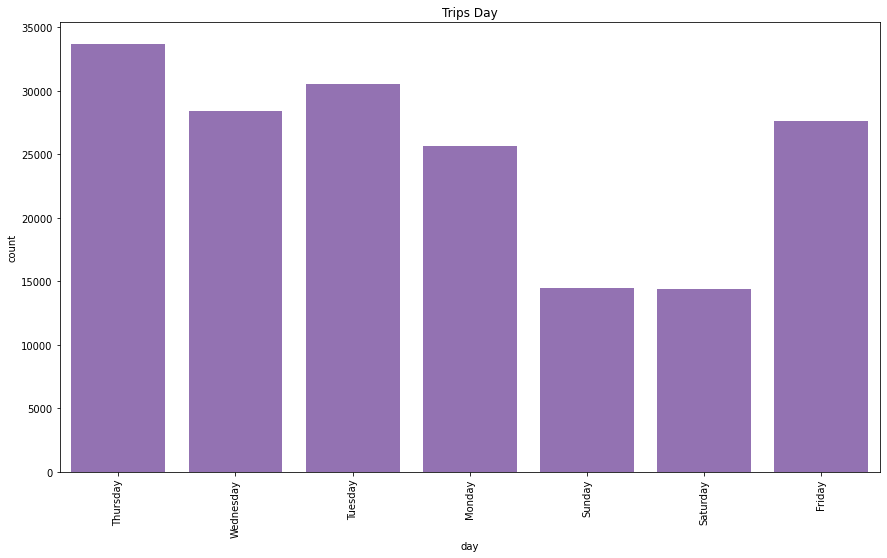

In [31]:
#plot trips taken in terms of day of the week
plt.figure(figsize=[14.70, 8.27])
trips=base_color = sb.color_palette()[4]
trips=sb.countplot(data=fordbike, x='day', color=base_color);
trips=plt.title('Trips Day')
trips=plt.xticks(rotation=90)


Thursday is  when most trips taken in terms of day of the week

# How long does the average trip take?

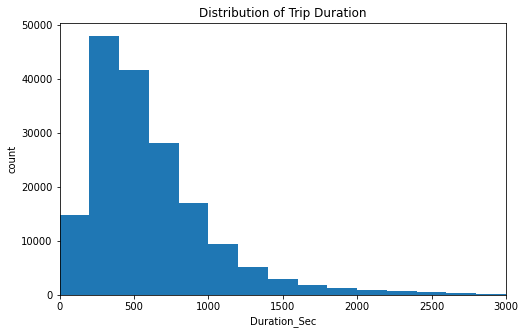

In [32]:
# start with a standard-scaled plot
binsize = 200
bins = np.arange(0, fordbike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = fordbike, x = 'duration_sec', bins = bins)
plt.xlim(0, 3000)
plt.ylabel('count')
plt.xlabel('Duration_Sec')
plt.title('Distribution of Trip Duration')
plt.show()


 the data is look highly skewed lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution

change the trip duration from seconds to minutes .

In [33]:
# change trip duration from second to minute
fordbike['duration_min'] = fordbike['duration_sec'] / 60


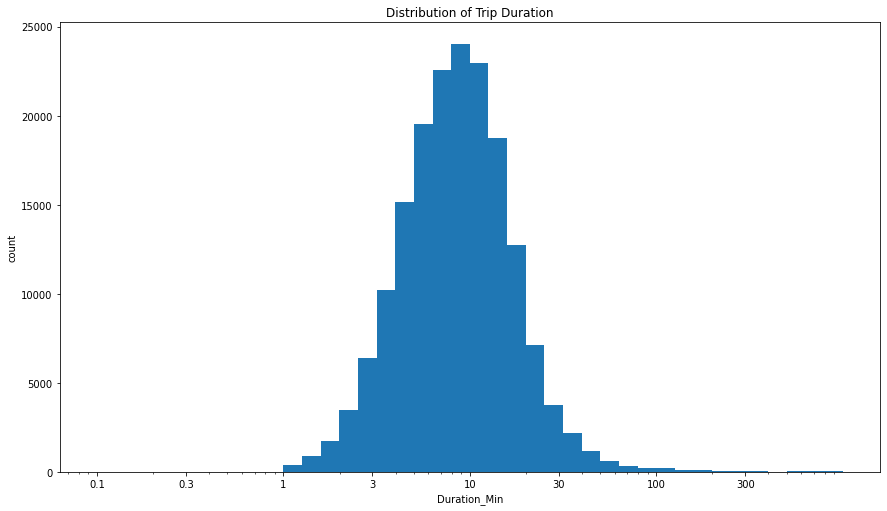

In [34]:
# trip duration distribution in log scale
plt.figure(figsize=[14.70, 8.27])
dur=bins = 10 ** np.arange(-1, 3+0.1, 0.1)
dur=ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300 ]
dur=labels = ['{}'.format(v) for v in ticks]
dur=plt.hist(data=fordbike, x='duration_min', bins=bins);
dur=plt.xscale('log')
dur=plt.xticks(ticks, labels);
dur=plt.xlabel('Duration_Min')
dur=plt.ylabel('count')
dur=plt.title('Distribution of Trip Duration')

The long does the average trip take lasting just under 10 minutes.

# Customer VS Subscriber 

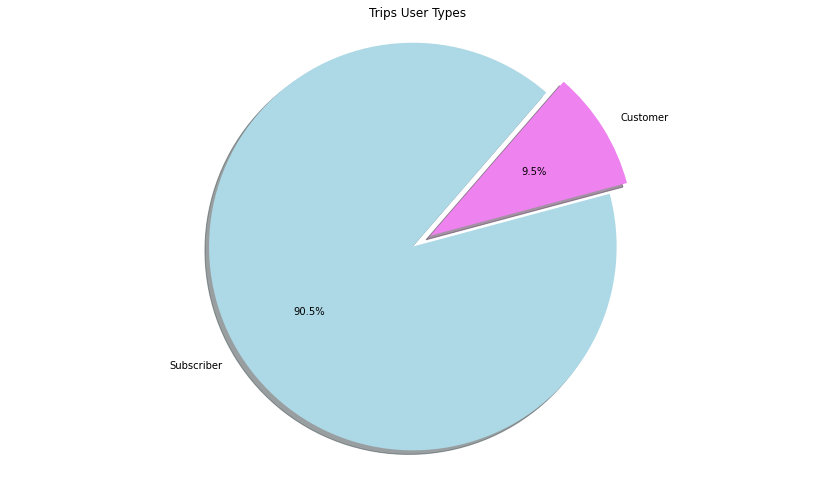

In [35]:
#plot trip user type relationship
plt.figure(figsize=[14.70, 8.27])
counts = [16566,158386]
user_type= 'Customer','Subscriber'
my_colors = ['violet','lightblue']
my_explode = (0, 0.1)
plt.pie(counts, labels=user_type, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Trips User Types')
plt.axis('equal')
plt.show()

The percentage of subscriber users is 90.5% vs 9.5% of Customer users

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The average the trip take is look highly skewed lots of points with low values, with a very long tail of data points with large values.
Applying a logarithmic transform to the data, the data will follow a normal distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Most trips taken in terms of day of the week, make new columns from start_time columns for days of week , to expoler the average of trips taken through the week and which day has the most trips 


## Bivariate Exploration



# which of the  member gender participate in trips through days week?

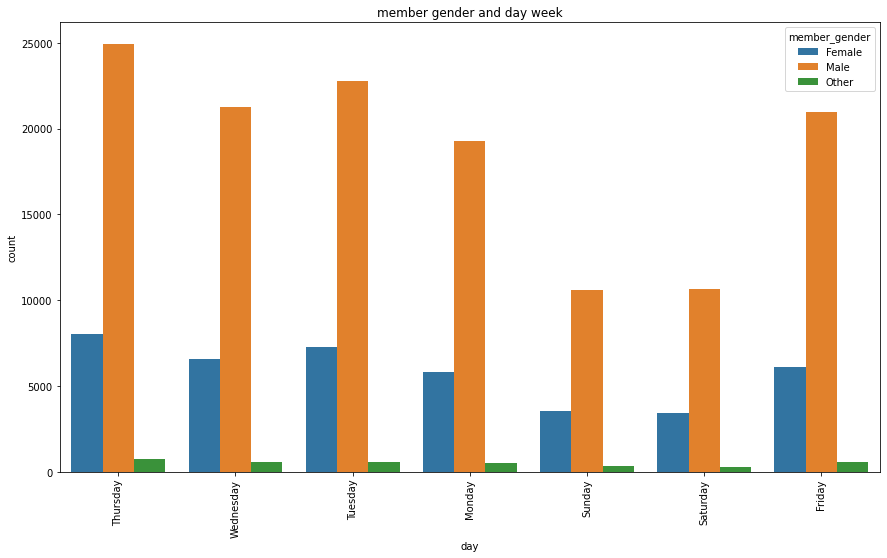

In [36]:
#plot relationship between member gender and days of week
member_day=plt.figure(figsize=[14.70, 8.27])
member_day=sb.countplot(data = fordbike, x = 'day', hue = 'member_gender')
member_day=plt.title('member gender and day week')
member_day=plt.xticks(rotation=90)

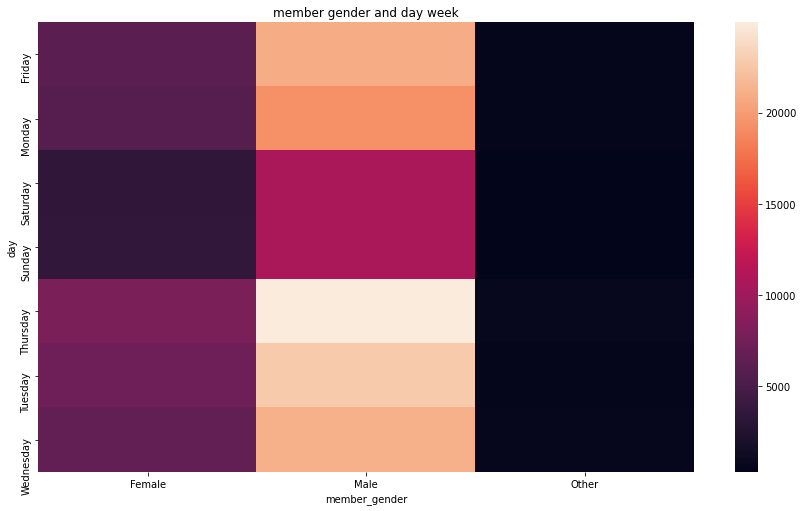

In [37]:
#plot relationship between member gender and day of trips
plt.figure(figsize=[14.70, 8.27])
gender_day = fordbike.groupby(['day', 'member_gender']).size()
gender_day = gender_day.reset_index(name='count')
gender_day =gender_day.pivot(index = 'day', columns = 'member_gender', values = 'count')
gender_day=sb.heatmap(gender_day)
gender_day=plt.title('member gender and day week')


from the two  plots above  we can predicated that the number of males who participate in trips through days of week is more than females 

# which start station perfer each of the users? 

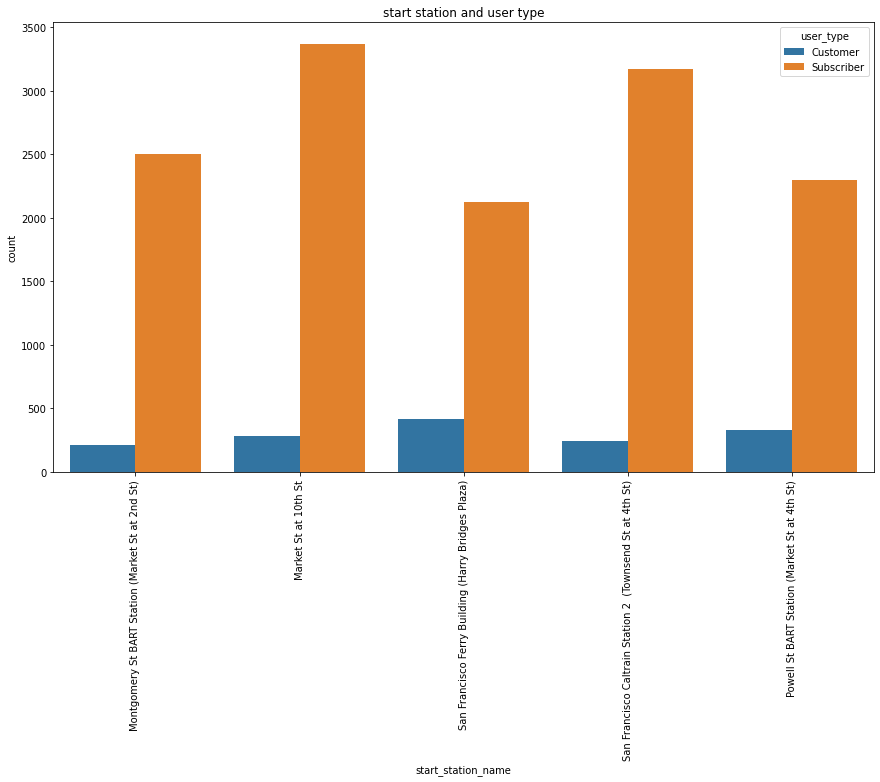

In [38]:
#plot relationship between user type and start station
user_station=plt.figure(figsize=[14.70, 8.27])
user_station=sb.countplot(data = fordbike5, x = 'start_station_name', hue = 'user_type')
user_station=plt.xticks(rotation=90)
user_station=plt.title('start station and user type')


from plot we can predicated that  subscriber perfer 'Market St at 10th St' station while customer perfer 'San Francisco Ferry Building (Harry Bridges Plaza)' station

# which gender paricipate more in trips? 

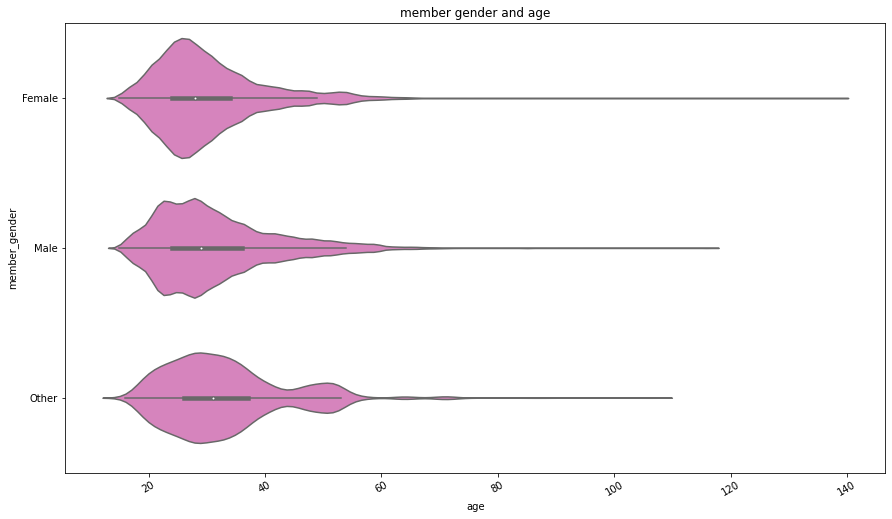

In [39]:
#plot relationship between member gender and member birth year
gender_age=plt.figure(figsize=[14.70, 8.27])
gender_age=base_color = sb.color_palette()[6]
gender_age=sb.violinplot(data=fordbike, x='age', y='member_gender', color=base_color)
gender_age=plt.xticks(rotation=30);
gender_age=plt.title('member gender and age')


from the violin plot we can predicated that the females whose age between 40 and 20 are more participate in trips than males in the same age


# what is the age participate more in the trips?

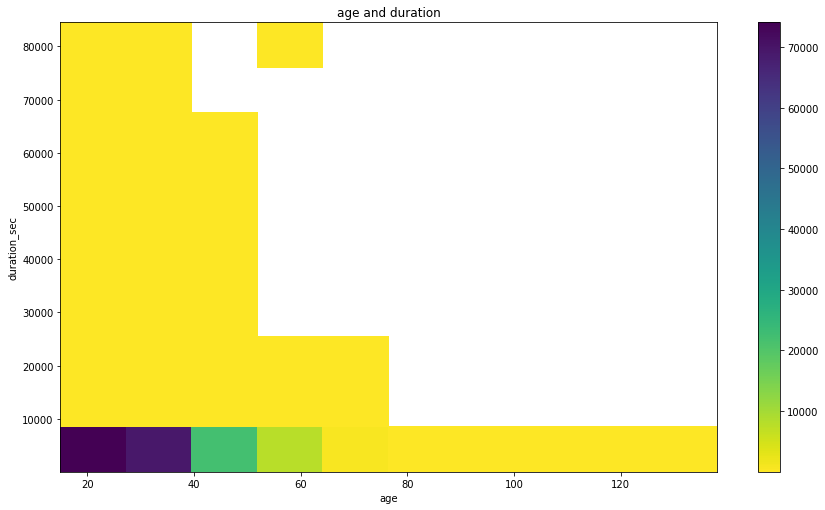

In [40]:
#plot relationship between member age and the duration of trips
age_duration=plt.figure(figsize=[14.70, 8.27])
age_duration=plt.hist2d(data = fordbike, x = 'age', y = 'duration_sec', cmin=0.5, cmap='viridis_r')
age_duration=plt.colorbar()
age_duration=plt.title('age and duration')
age_duration=plt.xlabel('age')
age_duration=plt.ylabel('duration_sec');

from plot we can predicated that member whose age between 20 and 40 has  spent more duration in trips than the others

# which users are bike share for trips? 

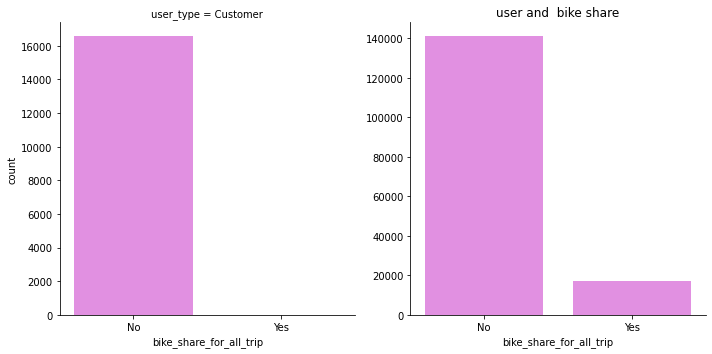

In [41]:
#plot relationship between user type and bike share for all trip
share=sb.catplot(data=fordbike, x='bike_share_for_all_trip', col="user_type", kind='count', sharey = False, color = 'violet')
share=plt.tight_layout()
share=plt.title('user and  bike share')


when we looked at what type of user who bike share for all trip we find that the subscriber are who bike share for all trip and customer are rarely done 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
we can predicated that the number of males who participate in trips through days of week is more than females
member whose age between 20 and 40 has spent more duration in trips than the others
user who bike share for all trip we find that the subscriber are who bike share for all trip and customer are rarely done
from plot we can predicated that subscriber perfer 'Market St at 10th St' station while customer perfer 'San Francisco Ferry Building (Harry Bridges Plaza)' station
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

despite that the total number of male who participate in trips is more than female but the females whose age between 20 and 40 are more participate in trips than males in the same age 

## Multivariate Exploration



# which day of week does users spent more time?


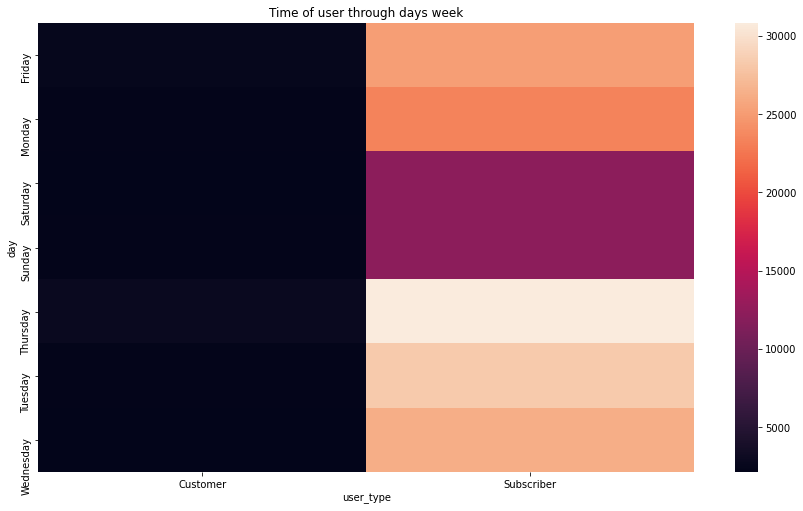

In [42]:
# Finding out how the average trip time is affected by user type and day week.
plt.figure(figsize=[14.70, 8.27])
user_duration = fordbike.groupby(['day', 'user_type']).size()
user_duration = user_duration.reset_index(name='duration_sec')
user_duration =user_duration.pivot(index = 'day', columns = 'user_type', values = 'duration_sec')
user_duration=sb.heatmap(user_duration)
user_duration=share=plt.title('Time of user through days week')


subscriber spent more time in through day week than customer
as we see before thursday is the day in which user spent more time in trips

# who spent more time in trips subscriber or customer?

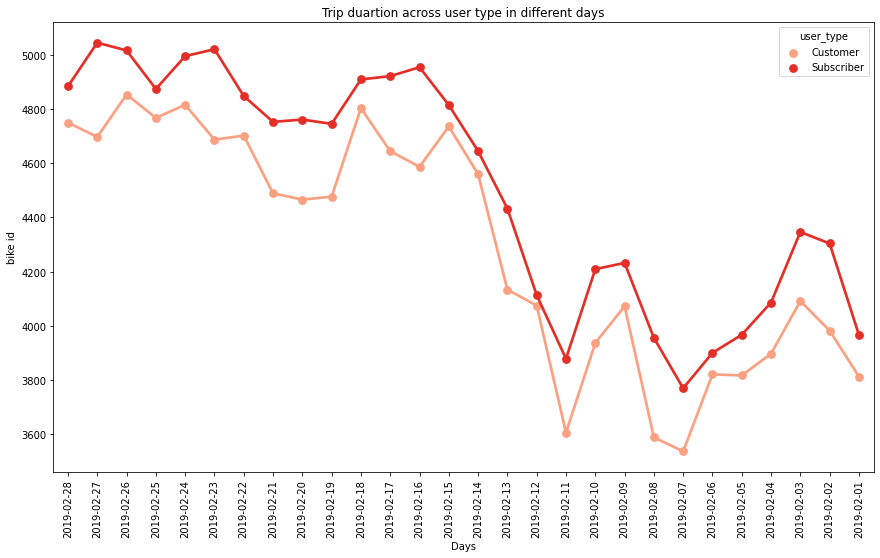

In [43]:
#plot relationship between days of month and user type
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(data = fordbike, x = 'date', y = 'bike_id', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('bike id')
plt.xlabel('Days')
plt.xticks(rotation=90);
plt.show();

When looking at user type across day of month february of the trip we do not any different in days of month both have approximate percentages. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

subscriber spent more time in through day week than customer
as we see before thursday is the day in which user spent more time in trips
When looking at user type across day of month february of the trip we do not any different in days of month both have approximate percentages. 
### Were there any interesting or surprising interactions between features?
females whose age between 20 and 40 are more participate in trips than males in the same age 
